In [33]:
source('helpers.R')
kaggle.house.loadLibraries()

df.combined = kaggle.house.PrepareCombinedDataSet()
df.lot_frontage = df.combined %>% filter(!is.na(LotFrontage))
df.lot_frontage %>% count()

n
2433


* Neighborhood == 'Somerst' & LotShape2 == 'Reg'
* Neighborhood == 'Somerst' & LotShape2 != 'Reg'
* Neighborhood != 'Somerst' & LotShape2 == 'Reg' & HouseStyle.2Story == 'N' & GarageType2 == 'Detchd'
* Neighborhood != 'Somerst' & LotShape2 == 'Reg' & HouseStyle.2Story == 'N' & GarageType2 == 'Attchd'
* Neighborhood != 'Somerst' & LotShape2 == 'Reg' & HouseStyle.2Story == 'N' & GarageType2 == 'Another'
* Neighborhood != 'Somerst' & LotShape2 == 'Reg' & HouseStyle.2Story == 'Y'
* Neighborhood != 'Somerst' & LotShape2 != 'Reg' & LotConfig2 == 'Corner'
* Neighborhood != 'Somerst' & LotShape2 != 'Reg' & LotConfig2 == 'Inside'
* Neighborhood != 'Somerst' & LotShape2 != 'Reg' & LotConfig2 != 'Inside' & LotConfig2 != 'Corner'
* 
* A1 & B1
* A1 & B2
* A2 & B1 & C1 & E1
* A2 & B1 & C1 & E2
* A2 & B1 & C1 & E3
* A2 & B1 & C2
* A2 & B2 & D1
* A2 & B2 & D2
* A2 & B2 & D3

In [50]:
options(repr.plot.width = 10, repr.plot.height = 10)

df = 
    df.lot_frontage %>%
    mutate(
        Split.Condition = case_when(
            
            (Neighborhood == 'Somerst' &
               LotShape2 == 'Reg') ~ 'A1B1',
            
            (Neighborhood == 'Somerst' &
               LotShape2 != 'Reg') ~ 'A1B2',
            
            (Neighborhood != 'Somerst' &
               LotShape2    == 'Reg' &
                 HouseStyle.2Story == 'N' &
                   GarageType2 == 'Detchd') ~ 'A2B1C1E1',
            
            (Neighborhood != 'Somerst' &
               LotShape2    == 'Reg' &
                 HouseStyle.2Story == 'N' &
                   GarageType2 == 'Attchd') ~ 'A2B1C1E2',
            
            (Neighborhood != 'Somerst' &
               LotShape2    == 'Reg' &
                 HouseStyle.2Story == 'N' &
                   GarageType2 == 'Another') ~ 'A2B1C1E3',
            
            (Neighborhood != 'Somerst' &
               LotShape2    == 'Reg' &
                 HouseStyle.2Story == 'Y') ~ 'A2B1C2',
            
            (Neighborhood != 'Somerst' &
               LotShape2    != 'Reg' &
                 LotConfig2 == 'Corner') ~ 'A2B2D1',
            
            (Neighborhood != 'Somerst' &
               LotShape2    != 'Reg' &
                 LotConfig2 == 'Inside') ~ 'A2B2D2',
            
            (Neighborhood != 'Somerst' &
               LotShape2    != 'Reg' &
                 LotConfig2 != 'Inside' & LotConfig2 != 'Corner') ~ 'A2B2D3'
    )) %>%
    group_by(Split.Condition)

model = df %>% 
    do(mod = lm(LotFrontage.Log ~ LotArea.Log, data=.))

fitted = df %>% 
    do(augment(lm(LotFrontage.Log ~ LotArea.Log, data=.), data = .))

df %>% summarise(n=n())
df %>% summarise(n=n()) %>% summarise(sum(n))
model %>% glance(mod)
model %>% tidy(mod)



Split.Condition,n
A1B1,113
A1B2,49
A2B1C1E1,452
A2B1C1E2,605
A2B1C1E3,154
A2B1C2,403
A2B2D1,123
A2B2D2,433
A2B2D3,101


sum(n)
2433


Split.Condition,r.squared,adj.r.squared,sigma,statistic,p.value,df,logLik,AIC,BIC,deviance,df.residual
A1B1,0.98092928,0.98075747,0.06516072,5709.441459,2.771905e-97,2,149.260431,-292.52086,-284.33870,0.471297,111
A1B2,0.43393465,0.42189070,0.30995755,36.029282,2.668880e-07,2,-11.112331,28.22466,33.90012,4.515463,47
A2B1C1E1,0.27667712,0.27506974,0.14934222,172.128811,1.589916e-33,2,219.126710,-432.25342,-419.91237,10.036394,450
A2B1C1E2,0.73361615,0.73317439,0.14745037,1660.650739,2.340109e-175,2,300.673347,-595.34669,-582.13101,13.110192,603
A2B1C1E3,0.61774388,0.61522904,0.22392848,245.639158,1.486310e-33,2,12.940018,-19.88004,-10.76918,7.621882,152
A2B1C2,0.86861144,0.86828379,0.17843507,2651.016185,7.967247e-179,2,123.753061,-241.50612,-229.50931,12.767468,401
A2B2D1,0.42330944,0.41854340,0.20391180,88.817895,3.790331e-16,2,22.057113,-38.11423,-29.67767,5.031183,121
A2B2D2,0.30432032,0.30270621,0.24479397,188.538001,7.581044e-36,2,-4.020552,14.04110,26.25332,25.827281,431
A2B2D3,0.08690393,0.07768073,0.37234693,9.422326,2.766346e-03,2,-42.521905,91.04381,98.88917,13.725582,99


Split.Condition,term,estimate,std.error,statistic,p.value
A1B1,(Intercept),-3.2500195,0.09679394,-33.5766836,5.755464e-60
A1B1,LotArea.Log,0.8295389,0.01097842,75.5608461,2.771905e-97
A1B2,(Intercept),-0.7273705,0.81326468,-0.8943835,3.756741e-01
A1B2,LotArea.Log,0.5424687,0.09037471,6.0024397,2.668880e-07
A2B1C1E1,(Intercept),1.1403487,0.22618328,5.0417019,6.700296e-07
A2B1C1E1,LotArea.Log,0.3300755,0.02515860,13.1197870,1.589916e-33
A2B1C1E2,(Intercept),-1.1474090,0.13304256,-8.6243759,5.693642e-17
A2B1C1E2,LotArea.Log,0.5943219,0.01458420,40.7510827,2.340109e-175
A2B1C1E3,(Intercept),-0.5991792,0.30026712,-1.9954874,4.777667e-02
A2B1C1E3,LotArea.Log,0.5246281,0.03347362,15.6728797,1.486310e-33


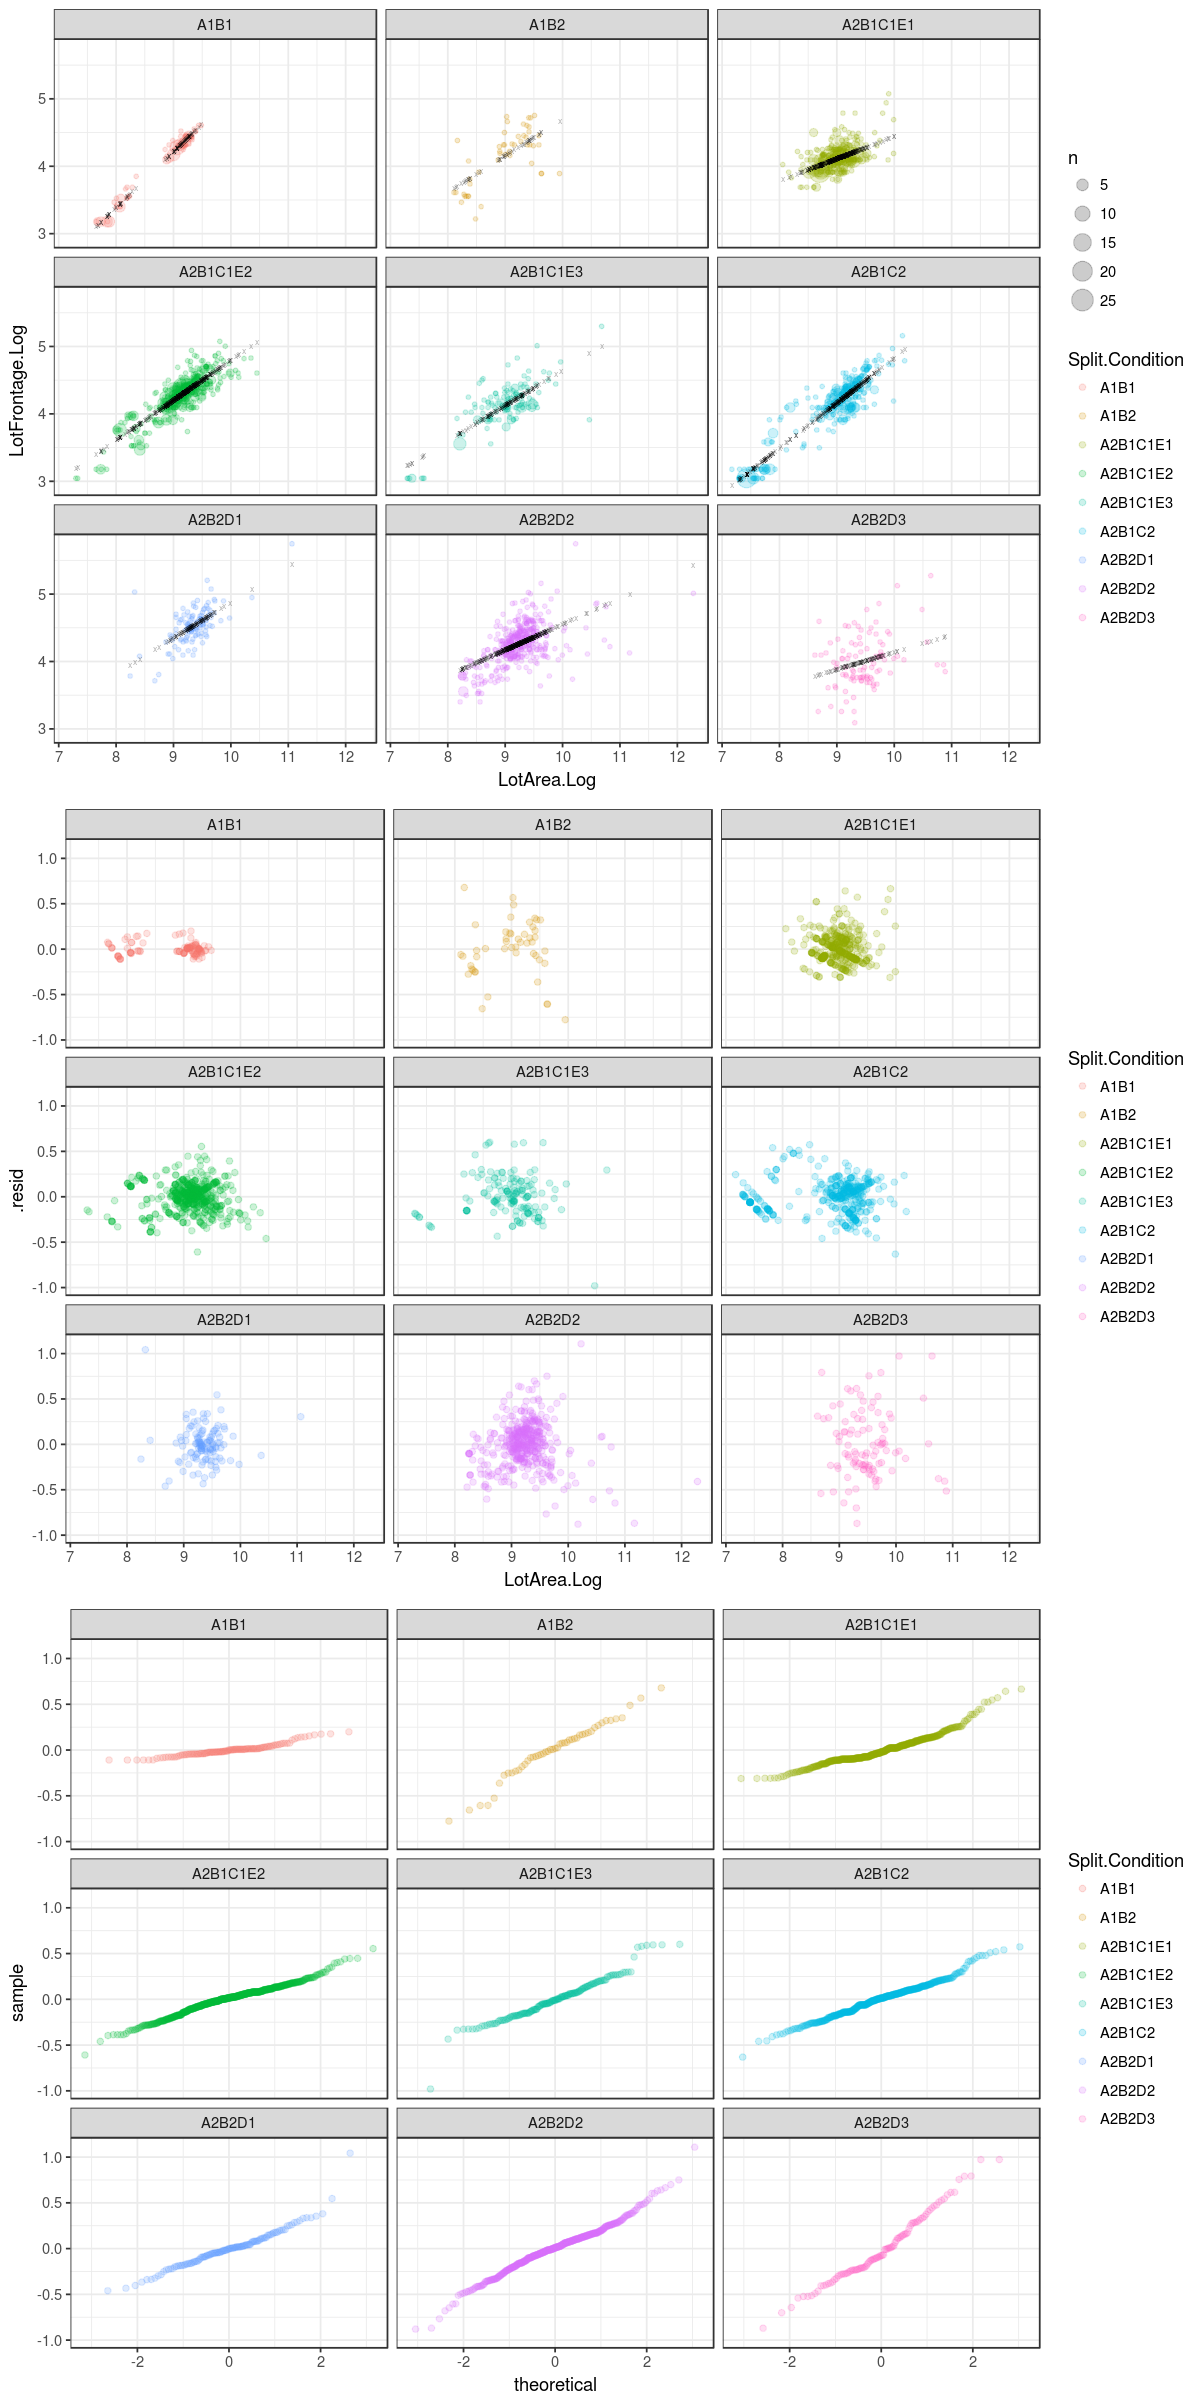

In [38]:
options(repr.plot.width = 10, repr.plot.height = 20)

g1 = 
    ggplot() +
    geom_count(data=fitted, aes(x=LotArea.Log, y=LotFrontage.Log, colour = Split.Condition), alpha=0.2) +
    geom_point(data=fitted, aes(x=LotArea.Log, y=.fitted), alpha=0.3, color="black", shape='x') +
    facet_wrap(~Split.Condition) +
    theme_bw()

g2 = 
    ggplot() +
    geom_point(data=fitted, aes(x=LotArea.Log, y=.resid, colour=Split.Condition), alpha=0.2) +
    facet_wrap(~Split.Condition) +
    theme_bw()

g3 =
    ggplot(fitted, aes(sample=.resid, colour=Split.Condition)) +
    stat_qq(distribution=qnorm, alpha=0.2) +
    facet_wrap(~Split.Condition) +
    theme_bw()

grid.arrange(g1, g2, g3,    
    layout_matrix=rbind(
        c(1), c(2), c(3)
    )
)